# App Store Games - SQL Analysis 
**Người thực hiện:** Vũ Hải Nam



Overview:

"Trong bối cảnh thị trường App Store Games đã bão hòa với hàng ngàn apps cạnh tranh trong giai từ năm 2008-2019, stakeholders (developers, investors, publishers) cần hiểu rõ:
- Yếu tố nào quyết định sự thành công của một game app?
- Xu hướng nào đang định hình thị trường và hành vi người dùng?
- Cơ hội nào còn tồn tại trong các phân khúc chưa được khai thác?

Problem statement:
1. **Phân tích xu hướng thị trường**: Hiểu rõ sự phát triển của App Store Games theo thời gian
2. **Xác định yếu tố thành công**: Tìm ra mối tương quan giữa giá, rating, reviews, size
3. **Phân tích phân khúc thị trường**: So sánh Free vs Paid apps, phân tích theo thể loại
4. **Khám phá cơ hội tiềm năng**: Tìm kiếm "Hidden Gems" và khoảng trống thị trường

## 1. Setup và Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
from datetime import datetime

## 2. Kết nối Database

In [9]:
pyodbc.drivers()

['SQL Server',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server',
 'SQL Server Native Client 11.0',
 'ODBC Driver 11 for SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)',
 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)']

In [10]:
# tao trusted connection 
trusted_connection = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'Server=LAPTOP-PM1847HD\\HNSQL;'
    'Database=Game_Analysis;'
    'Trusted_Connection=yes;'
)


In [11]:
# doc du lieu tu sql server
sql = "SELECT * FROM dbo.App_Store_Games"

df = pd.read_sql_query(sql, trusted_connection)




C:\Users\nnamn\AppData\Local\Temp\ipykernel_39948\301317691.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, trusted_connection)


## 4. KHÁM PHÁ DỮ LIỆU

## kham pha du lieu 

In [46]:
df.info

df.describe

<bound method NDFrame.describe of                                                  App_URL     App_ID  \
0       https://apps.apple.com/us/app/sudoku/id284921427  284921427   
1      https://apps.apple.com/us/app/reversi/id284926400  284926400   
2      https://apps.apple.com/us/app/morocco/id284946595  284946595   
3      https://apps.apple.com/us/app/sudoku-free/id28...  285755462   
4      https://apps.apple.com/us/app/boomshine/id2922...  292242592   
...                                                  ...        ...   
16842  https://apps.apple.com/us/app/backgammon-the-b...  517995893   
16843  https://apps.apple.com/us/app/chess-score-pad/...  518018730   
16844  https://apps.apple.com/us/app/ape-punch/id5180...  518021306   
16845  https://apps.apple.com/us/app/lair-defense-dun...  518223464   
16846  https://apps.apple.com/us/app/lair-defense-shr...  518526472   

                              Name                        Subtitle  \
0                           Sudoku         

### 4.1. Kiem tra gia tri NULL

In [ ]:
# Kiểm tra giá trị NULL
null_counts = df.isnull().sum()
print(null_counts)

print(f"Giá trị NULL trong dataset: {null_counts.sum()} ") 

# xu ly gia tri null 

df['Subtitle'] = df['Subtitle'].fillna('No Subtitle')

df['User Rating Count'] = df['User Rating Count'].fillna(0)

df['Average User Rating'] = df['Average User Rating'].fillna()


App_URL                0
App_ID                 0
Name                   0
Subtitle               0
Icon_URL               0
Average_User_Rating    0
User_Rating_Count      0
Price_per_App_USD      0
Description            0
Developer              0
Age_Rating             0
Languages              0
Size_in_Bytes          0
Primary_Genre          0
Genres                 0
Release_Date           0
dtype: int64
Giá trị NULL trong dataset: 0 


### 4.2. Kiểm tra giá trị trung lap

In [48]:
# kiem tra du lieu trung lap 
duplicate_df = df[df.duplicated()]
duplicate_count = duplicate_df.count()
print(duplicate_count)

print(f"Tong so dong trung lap : {duplicate_count.sum()}")

# xu ly du lieu trung lap 
df_cleaned = duplicate_df.drop_duplicates(keep = 'first')

# cap nhat df
df = df_cleaned

App_URL                0
App_ID                 0
Name                   0
Subtitle               0
Icon_URL               0
Average_User_Rating    0
User_Rating_Count      0
Price_per_App_USD      0
Description            0
Developer              0
Age_Rating             0
Languages              0
Size_in_Bytes          0
Primary_Genre          0
Genres                 0
Release_Date           0
dtype: int64
Tong so dong trung lap : 0


## 5. PHÂN TÍCH THEO THỜI GIAN

### 5.1. Số lượng game phát hành theo tháng

C:\Users\nnamn\AppData\Local\Temp\ipykernel_2972\178734244.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql, trusted_connection)


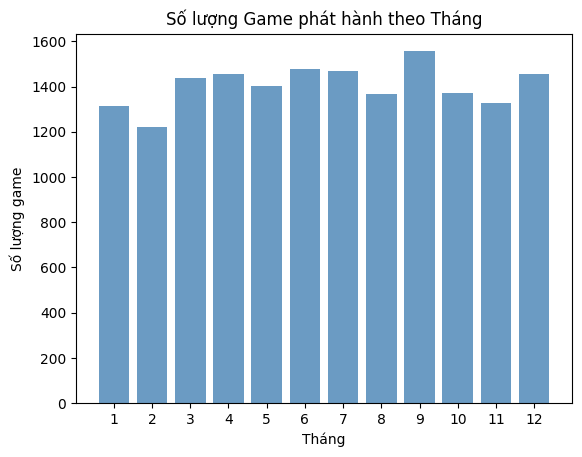

,Release_Month,total_apps
0,1,1312
1,2,1221
2,3,1436
3,4,1456
4,5,1402
5,6,1479
6,7,1468
7,8,1365
8,9,1556
9,10,1370


In [63]:
sql = """
SELECT 
    DATEPART(MONTH, Release_Date) AS Release_Month,
    COUNT(*) AS total_apps
FROM dbo.App_Store_Games
WHERE Release_Date IS NOT NULL
GROUP BY MONTH(Release_Date)
ORDER BY Release_Month;
"""

result = pd.read_sql_query(sql, trusted_connection)



# bieu do 
plt.bar(result['Release_Month'], result['total_apps'], color='steelblue', alpha=0.8)
plt.xticks(range(1, 13))
plt.xlabel('Tháng')
plt.ylabel('Số lượng game')
plt.title('Số lượng Game phát hành theo Tháng')
plt.show()

result


### 5.2. Số lượng game phát hành theo quý

C:\Users\nnamn\AppData\Local\Temp\ipykernel_2972\1547058528.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql, trusted_connection)


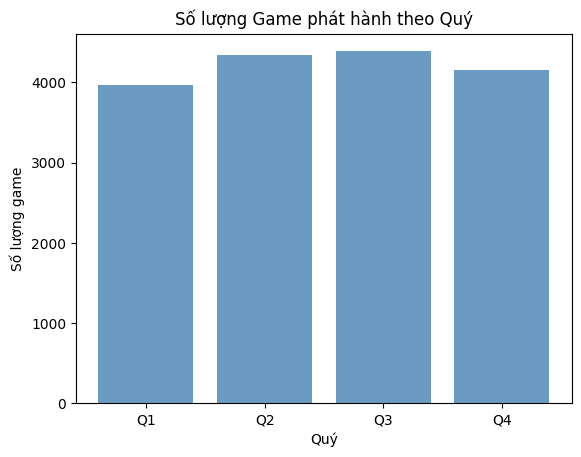

,release_quarter,total_apps
0,1,3969
1,2,4337
2,3,4389
3,4,4152


In [62]:
sql = """
SELECT 
    DATEPART(QUARTER, Release_Date) AS release_quarter, 
    COUNT(*) AS total_apps
FROM dbo.App_Store_Games
WHERE Release_Date IS NOT NULL
GROUP BY DATEPART(QUARTER, Release_Date)
ORDER BY release_quarter;
"""

result = pd.read_sql_query(sql, trusted_connection)

#bieu do 
plt.bar(result['release_quarter'], result['total_apps'], color='steelblue', alpha=0.8)
plt.xlabel('Quý')
plt.ylabel('Số lượng game')
plt.title('Số lượng Game phát hành theo Quý')
plt.xticks([1, 2, 3, 4], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.show()

result

In [127]:
sql = """
WITH apps AS (
  SELECT DATEPART(YEAR, Release_Date) AS y, DATEPART(MONTH, Release_Date) AS m , COUNT(*) apps
  FROM dbo.App_Store_Games
  GROUP BY YEAR(Release_Date), MONTH(Release_Date)
),
avg_app_per_year AS (
  SELECT y, m, apps, AVG(apps*1.0) OVER (PARTITION BY y) AS avg_app_year
  FROM apps
)
SELECT
  m,
 AVG(apps / NULLIF(avg_app_year,0.0)) AS month_ratio_per_year   
FROM avg_app_per_year
GROUP BY m
ORDER BY m;
"""

result = pd.read_sql_query(sql, trusted_connection)
result

C:\Users\nnamn\AppData\Local\Temp\ipykernel_2972\40429531.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql, trusted_connection)


,m,month_ratio_per_year
0,1,0.817220
1,2,0.850400
2,3,0.946226
3,4,1.040459
4,5,0.932958
5,6,0.964018
6,7,0.968136
7,8,1.024551
8,9,1.007708
9,10,0.980055


Phân tích
 Q2–Q3 (Apr–Sep) có nhiều release nhất (khoảng 4.300 app mỗi quý)
 Tháng 6, 7 , 9 là đạt đinh, Tháng 2 , 11 thấp hơn giai đoạn thấp hon

 Chi tiết:
 Kết quả phân tích chỉ số seasonality theo tháng cho thấy, ngoại trừ tháng 11 và 12 ghi nhận có số lượng ứng dụng phát hành cao hơn đáng kể ( tháng 12 cao nhất, chỉ số 1.37),các tháng còn lại dao động quanh mức trung bình (1.0). Điều này cho thấy thị trường phát hành game trên App Store không có tính mùa vụ quá mạnh,  tháng 11–12: Có thể liên quan đến các dịp lễ lớn (Black Friday, Giáng sinh...) hoặc chuẩn bị cho dịp cuối năm.
 Thấp điểm đầu năm: Có thể do ảnh hưởng của nghỉ Tết dương lịch hoặc nhà phát triển lên kế hoạch ra mắt vào cuối năm.

### 5.3. Thống kê tổng quan theo năm (2008-2019)

C:\Users\nnamn\AppData\Local\Temp\ipykernel_2972\1031229888.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql, trusted_connection)


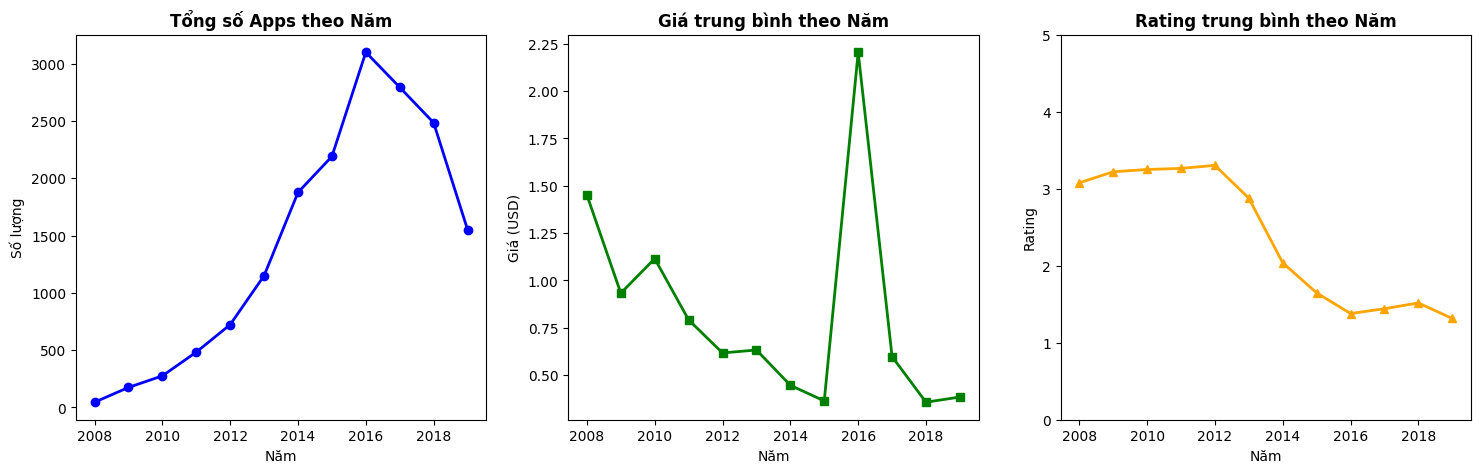

,release_year,total_apps,avg_price,avg_rating
0,2008,46,1.450870,3.076087
1,2009,175,0.932971,3.220000
2,2010,276,1.115362,3.250000
3,2011,483,0.791822,3.263975
4,2012,723,0.617261,3.303596
5,2013,1150,0.632991,2.877391
6,2014,1876,0.446487,2.038113
7,2015,2190,0.363986,1.647717
8,2016,3099,2.205057,1.378993
9,2017,2793,0.597777,1.441640


In [74]:
sql = """
SELECT 
    DATEPART(YEAR, Release_Date) AS release_year,
    COUNT(*) AS total_apps,
    AVG(Price_per_App_USD) AS avg_price,
    AVG(Average_User_Rating) AS avg_rating
FROM dbo.App_Store_Games
GROUP BY DATEPART(YEAR, Release_Date)
ORDER BY release_year;
"""

result = pd.read_sql_query(sql, trusted_connection)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# so luong app
axes[0].plot(result['release_year'], result['total_apps'], marker='o', linewidth=2, color='blue')
axes[0].set_title('Tổng số Apps theo Năm', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Năm')
axes[0].set_ylabel('Số lượng')

# gia trung binh
axes[1].plot(result['release_year'], result['avg_price'], marker='s', linewidth=2, color='green')
axes[1].set_title('Giá trung bình theo Năm', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Năm')
axes[1].set_ylabel('Giá (USD)')


# Rating trung bình
axes[2].plot(result['release_year'], result['avg_rating'], marker='^', linewidth=2, color='orange')
axes[2].set_title('Rating trung bình theo Năm', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Năm')
axes[2].set_ylabel('Rating')
axes[2].set_ylim(0, 5)

plt.show()

result

Phân tích
Tổng số app theo năm 

2008–2012: Tăng trưởng nhanh gấp 15 lần (50 -> 700 app), rating ổn định, rating TB giữ quanh 3.2–3.3, reviews trung bình >6.000/app.

2013–2016: thời gian bùng nổ mạnh tăng gần 170%,số app đạt đỉnh vào năm 2016 , rating giảm từ 2.9 → 1.37, reviews/app giảm mạnh 75%.

2017–2019: Số app giảm, rating không hồi phục, review giảm còn 400–900/app, rating TB 1.31.

Chi tiết tìm hiểu:

App count ↑ nhanh tới 2016 → bão hòa.

Rating ↓ liên tục → chất lượng/expectation mismatch.

Avg reviews ↓ → người dùng ít tương tác hơn (thiếu engagement).

### 5.4. Phân tích độ phổ biến qua reviews theo năm ( engagement)

C:\Users\nnamn\AppData\Local\Temp\ipykernel_39948\1773508925.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql, trusted_connection)


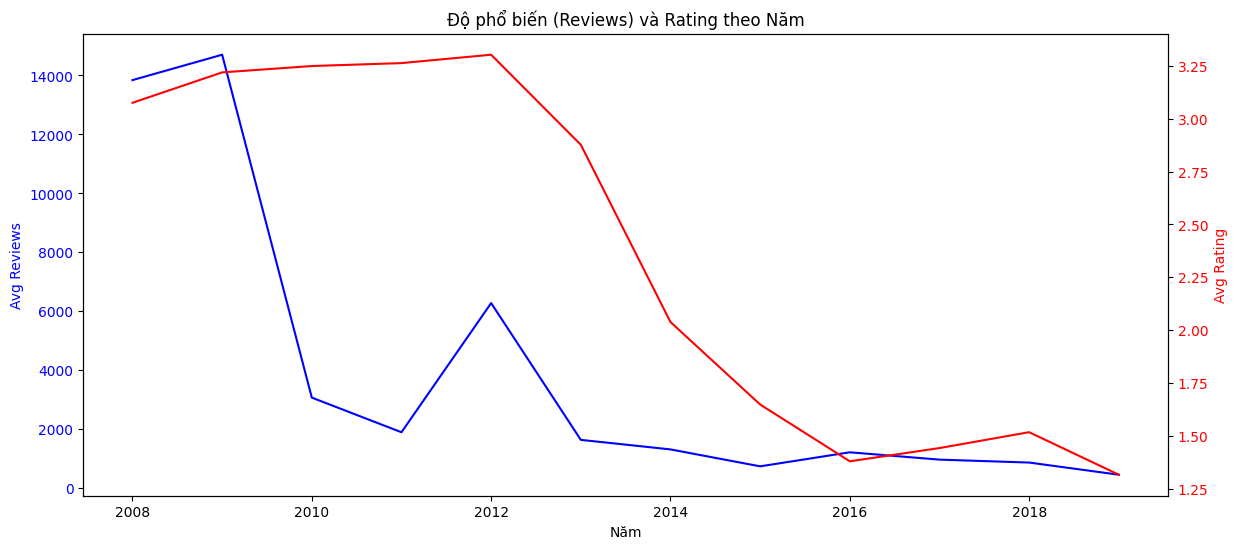

,release_year,total_apps,avg_reviews_per_app,avg_rating
0,2008,46,13842.217391,3.076087
1,2009,175,14703.565714,3.220000
2,2010,276,3068.554347,3.250000
3,2011,483,1892.635610,3.263975
4,2012,723,6276.038727,3.303596
5,2013,1150,1634.388695,2.877391
6,2014,1876,1310.572494,2.038113
7,2015,2190,736.255707,1.647717
8,2016,3099,1212.499193,1.378993
9,2017,2793,963.907268,1.441640


In [22]:
sql = """
SELECT 
  DATEPART(YEAR, Release_Date) AS release_year,
  COUNT(*) AS total_apps,
  AVG(User_Rating_Count*1.0) AS avg_reviews_per_app,
  AVG(Average_User_Rating)   AS avg_rating
FROM dbo.App_Store_Games
GROUP BY DATEPART(YEAR, Release_Date)
ORDER BY release_year;
"""

result = pd.read_sql_query(sql, trusted_connection)

#bieu do 

fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.set_xlabel('Năm')
ax1.set_ylabel('Avg Reviews', color='blue')
ax1.plot(result['release_year'], result['avg_reviews_per_app'], color='blue', label='Avg Reviews')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Avg Rating', color='red')
ax2.plot(result['release_year'], result['avg_rating'], color='red', label='Avg Rating')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Độ phổ biến (Reviews) và Rating theo Năm')
plt.show()

result

Phân tích 
2008–2012: Số app tăng mạnh, rating ổn định mức khá tốt (~3.2–3.3), reviews/app cao vượt trội (đỉnh năm 2008–2009).
2013–2016: App tăng rất nhanh, rating TB tụt sâu (xuống 1.x kể từ 2014) và review/app giảm rất mạnh
2017–2019: Số app giảm dần, rating không hồi phục, review/app càng ngày càng thấp.

Chi tiết
Nhìn vào số liệu, có thể thấy tỉ lệ app đạt thành công (có rating TB cao và nhiều review) giảm dần qua từng năm, đồng pha với việc rating trung bình cũng giảm và số lượng review trung bình trên mỗi app bị rơi thẳng đứng, đặc biệt sau khi thị trường bão hòa từ 2014 trở đi
Đỉnh success rate (ở câu hỏi trước) có thể thuộc các năm trước 2013, vốn là thời kỳ rating và review đều cao. Lúc đó việc đạt chuẩn “thành công” dễ hơn vì ít cạnh tranh, user tương tác nhiều hơn/app. Sau 2014, rating giảm nhanh, reviews giảm, nnhiều app ra mắt ào ạt, chất lượng giảm (rating tụt), user không còn nhiệt tình review mỗi app như trước (avg_reviews giảm).


### Xu hướng Genre theo năm

C:\Users\nnamn\AppData\Local\Temp\ipykernel_39948\2519016137.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql, trusted_connection)


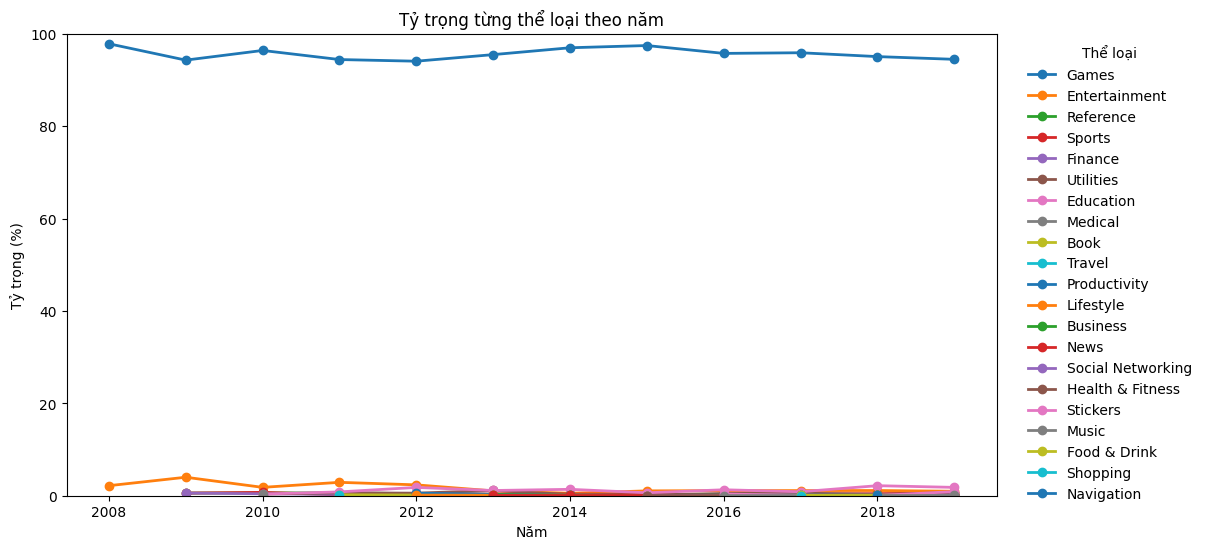

,release_year,Primary_Genre,apps,share_pct,avg_rating
0,2008,Games,45,97.826087,3.10
1,2008,Entertainment,1,2.173913,2.00
2,2009,Games,165,94.285714,3.26
3,2009,Entertainment,7,4.000000,2.29
4,2009,Reference,1,0.571429,3.00
...,...,...,...,...,...
117,2019,Lifestyle,1,0.064433,0.00
118,2019,News,1,0.064433,0.00
119,2019,Business,1,0.064433,0.00
120,2019,Music,1,0.064433,4.50


In [ ]:

sql = """
WITH genre AS (
  SELECT
    DATEPART(YEAR, Release_Date) AS release_year,
    Primary_Genre,
    COUNT(*) AS apps,
    AVG(Average_User_Rating*1.0) AS avg_rating
  FROM dbo.App_Store_Games
  GROUP BY DATEPART(YEAR, Release_Date), Primary_Genre
)
SELECT
  release_year,
  Primary_Genre,
  apps,
  100.0 * apps / SUM(apps) OVER (PARTITION BY release_year) AS share_pct,
  ROUND(avg_rating, 2) AS avg_rating
FROM genre
ORDER BY release_year, share_pct DESC;
"""

result = pd.read_sql_query(sql, trusted_connection)


plt.figure(figsize=(12,6))
for g in result['Primary_Genre'].dropna().unique():
    s = result[result['Primary_Genre'] == g].sort_values('release_year')
    plt.plot(s['release_year'], s['share_pct'], marker='o', linewidth=2, label=g)

plt.ylim(0, 100)
plt.xlabel('Năm'); plt.ylabel('Tỷ trọng (%)')
plt.title('Tỷ trọng từng thể loại theo năm')
plt.legend(title='Thể loại', bbox_to_anchor=(1.02,1), loc='upper left', frameon=False)
plt.show()

result

Phân tích
Games áp đảo tuyệt đối: 94–100% volume mỗi năm; các genre khác chỉ  ≤2–4% → không có “genre shift” đáng kể.
Avg_rating của Games từ ~3.3 (2012) rơi còn ~1.3–1.6 (2015–2019). Các genre nhỏ xuất hiện rải rác, rating đa phần cũng thấp và share rất nhỏ → không ảnh hưởng xu hướng chung.
Bão hòa trong chính Games: volume tăng mạnh sau 2013 nhưng chất lượng/engagement giảm → kéo rating chung xuống


### 5.5. Xu hướng Free vs Paid theo năm

C:\Users\nnamn\AppData\Local\Temp\ipykernel_39948\4203475194.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql, trusted_connection)


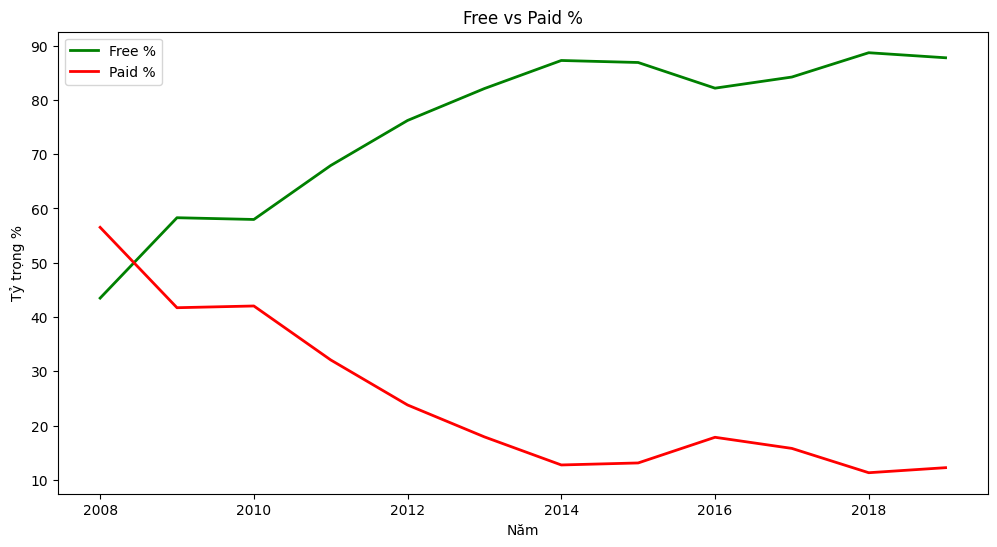

,release_year,app_type,apps,avg_rating,avg_reviews,share_pct
0,2008,Free,20,2.775000,28258,43.48
1,2008,Paid,26,3.307692,2753,56.52
2,2009,Free,102,3.127451,17483,58.29
3,2009,Paid,73,3.349315,10818,41.71
4,2010,Free,160,3.240625,4033,57.97
5,2010,Paid,116,3.262931,1737,42.03
6,2011,Free,328,3.294207,2334,67.91
7,2011,Paid,155,3.200000,957,32.09
8,2012,Free,551,3.356624,7363,76.21
9,2012,Paid,172,3.133721,2791,23.79


In [20]:
sql = """
WITH AppStats AS (
SELECT 
  DATEPART(YEAR, Release_Date) AS release_year,
  CASE WHEN [Price_per_App_USD]=0 THEN 'Free' ELSE 'Paid' END AS app_type,
  COUNT(*) AS apps,
  AVG(Average_User_Rating) AS avg_rating,
  AVG(User_Rating_Count)   AS avg_reviews
FROM dbo.App_Store_Games
GROUP BY DATEPART(YEAR, Release_Date),CASE WHEN [Price_per_App_USD]=0 THEN 'Free' ELSE 'Paid' END 
)

SELECT 
  release_year,
  app_type,
  apps,
  avg_rating,
  avg_reviews,
  CAST(100.0 * apps / SUM(apps) OVER (PARTITION BY release_year) AS DECIMAL(6,2)) AS share_pct
FROM AppStats
ORDER BY 1,2
"""

result = pd.read_sql_query(sql, trusted_connection)

# Tỷ trọng %
# ty trong free/share

free = result[result['app_type'] == 'Free']
paid = result[result['app_type'] == 'Paid']

plt.figure(figsize=(12, 6))
plt.plot(free['release_year'], free['share_pct'], color='green', label='Free %', linewidth=2)
plt.plot(paid['release_year'], paid['share_pct'],  color='red', label='Paid %', linewidth=2)
plt.xlabel('Năm'); plt.ylabel('Tỷ trọng %'); plt.title('Free vs Paid %')
plt.legend()
plt.show()

result

- Phân tích
Free share tăng mạnh: 43% (2008) → ~88% (2018–2019). Paid thu hẹp còn ~12%.
Chất lượng giảm theo thời gian ở cả 2 nhóm:
Free: avg_rating ~3.3 (2012) → ~1.36 (2019).
Paid: avg_rating ~3.26 (2010) → ~1.00 (2019).
Engagement (avg_reviews) rơi mạnh:
Free: 28k (2008) → ~0.5–1.5k (2016–2019).
Paid: 2.7k (2008) → ~50–340 (2016–2019).
Từ 2013 trở đi, Free áp đảo nhưng rating/engagement đều đi xuống 

# 6. PHÂN TÍCH THEO DANH MỤC (GENRE)

### 6.1. Top 10 thể loại phổ biến nhất

C:\Users\nnamn\AppData\Local\Temp\ipykernel_2972\2857582969.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql, trusted_connection)


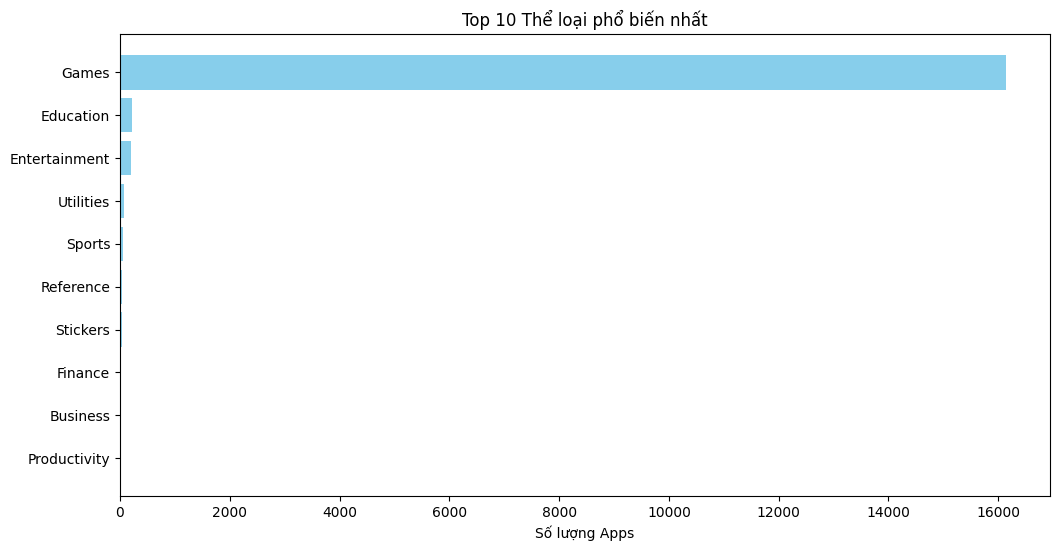

,Primary_Genre,number_of_apps
0,Games,16135
1,Education,217
2,Entertainment,197
3,Utilities,77
4,Sports,60
5,Reference,32
6,Stickers,29
7,Finance,18
8,Business,16
9,Productivity,15


In [ ]:
sql = """
SELECT TOP 10
    Primary_Genre, 
    COUNT(*) AS number_of_apps
FROM dbo.App_Store_Games
GROUP BY Primary_Genre
ORDER BY number_of_apps DESC;
"""

result = pd.read_sql_query(sql, trusted_connection)

# bieu do
plt.figure(figsize=(12, 6))
plt.barh(result['Primary_Genre'], result['number_of_apps'], color='skyblue')
plt.xlabel('Số lượng Apps')
plt.title('Top 10 Thể loại phổ biến nhất')
plt.gca().invert_yaxis()
plt.show()

result

Phân tích
Games là thể loại chính trong app storestore
Games chiếm hơn 94% tổng số app (16.135/17.000+).
Các genre khác rất nhỏ về số lượng (Education: 217, Entertainment: 197, còn lại đa số <100).
=> Tất cả xu hướng thị trường, rating, review... bị chi phối bởi Games. Sự tụt rating và giảm engagement chủ yếu phản ánh tình hình thể loại này.


### 6.2. Phân tích hiệu suất theo thể loại

C:\Users\nnamn\AppData\Local\Temp\ipykernel_2972\1138585922.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql, trusted_connection)


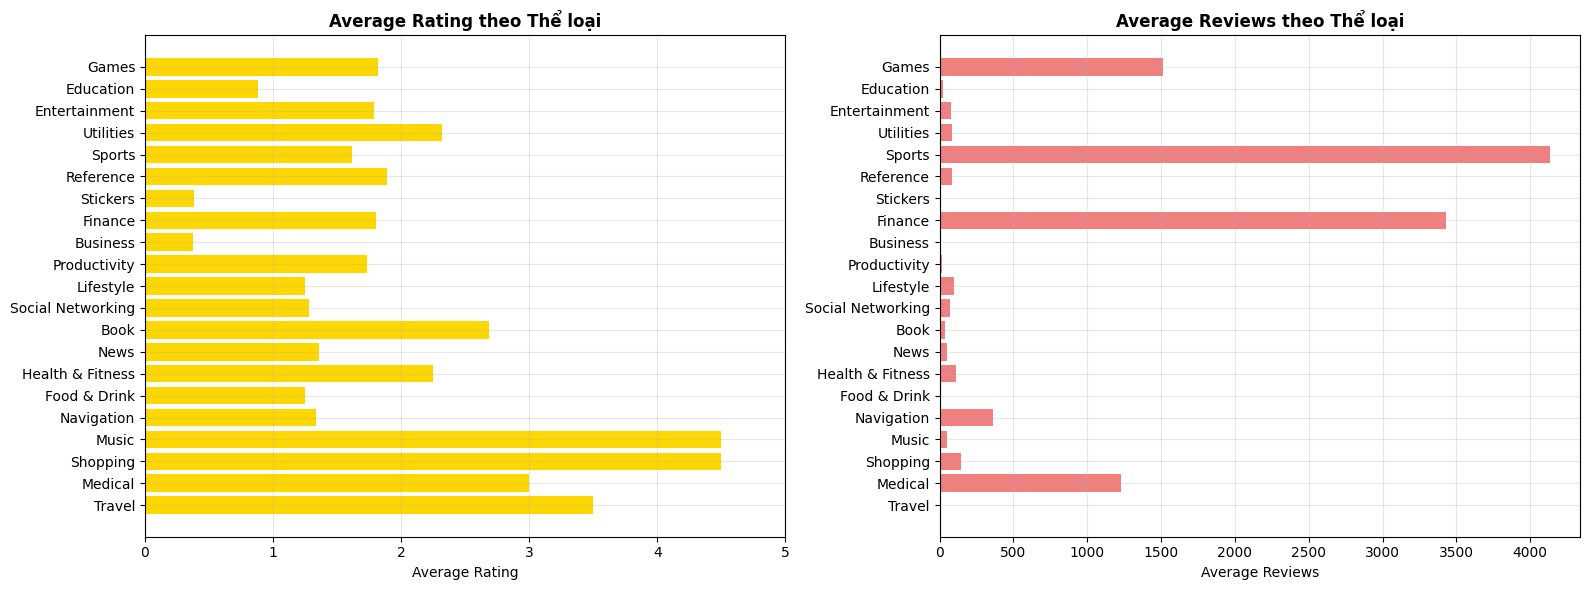

,Primary_Genre,apps,avg_rating,avg_reviews
0,Games,16135,1.819926,1512
1,Education,217,0.880184,26
2,Entertainment,197,1.789340,80
3,Utilities,77,2.318182,85
4,Sports,60,1.616667,4131
5,Reference,32,1.890625,86
6,Stickers,29,0.379310,2
7,Finance,18,1.805556,3433
8,Business,16,0.375000,2
9,Productivity,15,1.733333,13


In [82]:
sql = """
SELECT 
  Primary_Genre,
  COUNT(*) AS apps,
  AVG(Average_User_Rating) AS avg_rating,
  AVG(User_Rating_Count)   AS avg_reviews
FROM dbo.App_Store_Games
GROUP BY Primary_Genre
ORDER BY apps DESC;
"""

result = pd.read_sql_query(sql, trusted_connection)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Rating
axes[0].barh(result['Primary_Genre'], result['avg_rating'], color='gold')
axes[0].set_xlabel('Average Rating')
axes[0].set_title('Average Rating theo Thể loại', fontsize=12, fontweight='bold')
axes[0].set_xlim(0, 5)
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3)

# Reviews
axes[1].barh(result['Primary_Genre'], result['avg_reviews'], color='lightcoral')
axes[1].set_xlabel('Average Reviews')
axes[1].set_title('Average Reviews theo Thể loại', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

result

PPhân tích
Avg rating Games: 1.82 (rất thấp so với kỳ vọng “thành công” ≥ 4.2)
Avg reviews Games: 1512 (đa số reviews, dù rating thấp)
=>  lớn nhất cũng không có success rate nổi bật.
Các genre nhỏ hơn đa số còn thấp hơn nhiều, thậm chí một số genre cực thấp (Stickers 0.37, Business 0.37).


### 6.3. Top 10 thể loại có rating cao nhất

C:\Users\nnamn\AppData\Local\Temp\ipykernel_2972\1957221663.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql, trusted_connection)


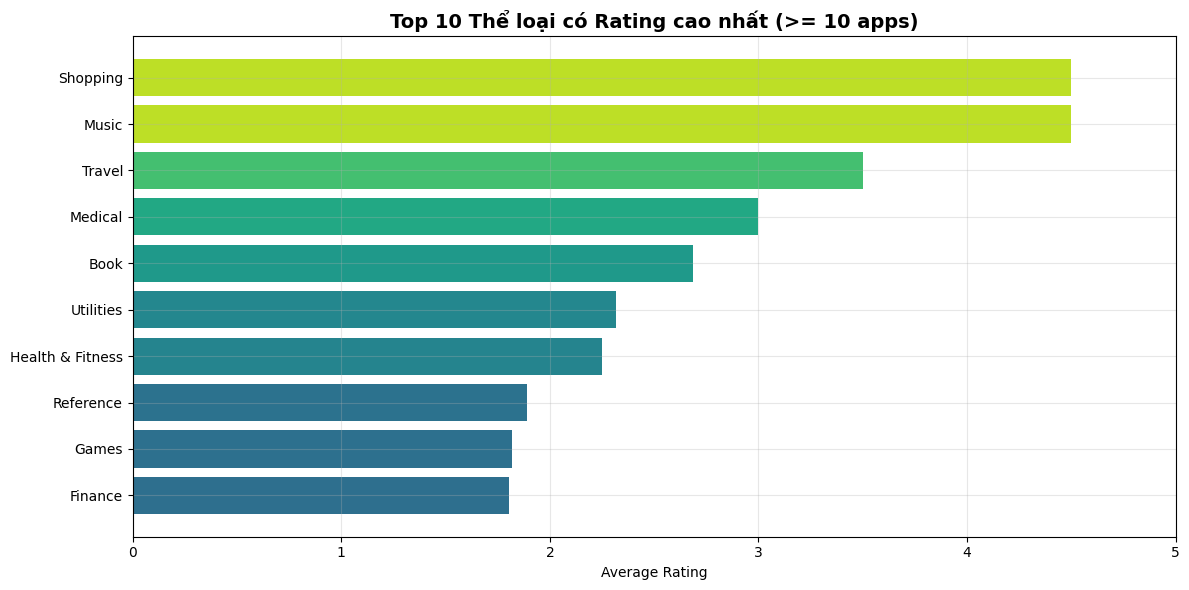

,Primary_Genre,avg_rating
0,Shopping,4.500000
1,Music,4.500000
2,Travel,3.500000
3,Medical,3.000000
4,Book,2.687500
5,Utilities,2.318182
6,Health & Fitness,2.250000
7,Reference,1.890625
8,Games,1.819926
9,Finance,1.805556


In [99]:
sql = """
SELECT TOP 10
    Primary_Genre, 
    AVG(Average_User_Rating) AS avg_rating
FROM dbo.App_Store_Games
GROUP BY Primary_Genre
ORDER BY avg_rating DESC;
"""

result = pd.read_sql_query(sql, trusted_connection)

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(result['avg_rating'] / 5.0)
plt.barh(result['Primary_Genre'], result['avg_rating'], color=colors)
plt.xlabel('Average Rating')
plt.title('Top 10 Thể loại có Rating cao nhất (>= 10 apps)', fontsize=14, fontweight='bold')
plt.xlim(0, 5)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

result

Phân tích
Genre đặc biệt có rating cao là Music (4.5), Shopping (4.5), nhưng số app quá nhỏ (1–3 app), không đại diện tạo thành trend.
Một số genre như Utilities, Book, Medical có rating trung bình cao hơn, nhưng do quá ít app nên không ảnh hưởng nhiều tới overall.
Nhiều genre nhỏ, avg_reviews lại rất cao (Finance: 3.433, Sports: 4.131) dù rating thấp.
Một số genre dù ít app lại có avg_reviews rất cao (Sports: 4.131, Finance: 3.433), nhưng rating vẫn không cao.
Những genre này có thể do đặc thù user trung thành hoặc app ít nhưng chất lượng; song vì số lượng ít, không ảnh hưởng đến toàn thị trường
Có thể nhóm người dùng trung thành hoặc app “trend” một giai đoạn, nhưng engagement cao vẫn chưa bảo đảm chất lượng nội dung.


### 6.4. Kích thước game trung bình theo thể loại

C:\Users\nnamn\AppData\Local\Temp\ipykernel_2972\2465962242.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql, trusted_connection)


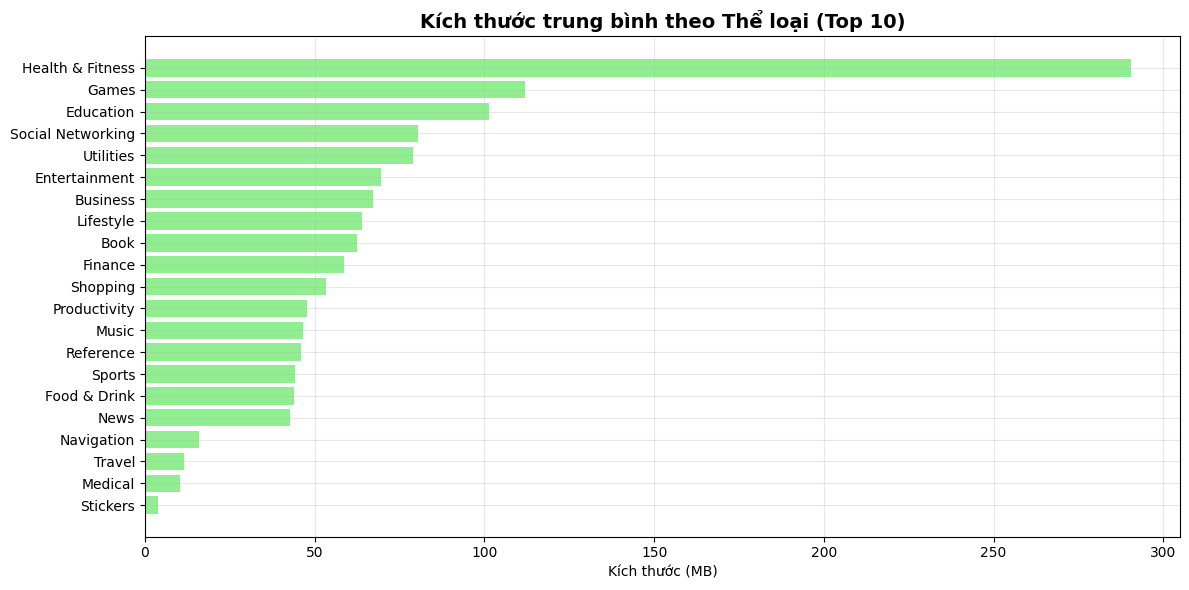

,Primary_Genre,avg_size_mb
0,Health & Fitness,290.4
1,Games,112.1
2,Education,101.3
3,Social Networking,80.3
4,Utilities,79.1
5,Entertainment,69.5
6,Business,67.2
7,Lifestyle,63.9
8,Book,62.5
9,Finance,58.7


In [105]:
sql = """
SELECT 
    Primary_Genre, 
    ROUND(AVG(Size_in_Bytes) / (1024.0 * 1024.0), 1) AS avg_size_mb
FROM App_Store_Games
WHERE Size_in_Bytes > 0
GROUP BY Primary_Genre
ORDER BY avg_size_mb DESC
"""

result = pd.read_sql_query(sql, trusted_connection)

plt.figure(figsize=(12, 6))
plt.barh(result['Primary_Genre'], result['avg_size_mb'], color='lightgreen')
plt.xlabel('Kích thước (MB)')
plt.title('Kích thước trung bình theo Thể loại (Top 10)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

result

Phân tích 
AAvg size khác nhau rõ theo genre; Games khá lớn (112MB) so với nhiều nhóm khác.Dung lượng trung bình khác biệt lớn giữa các genre; nhóm dung lượng nhỏ (Stickers, Medical, Travel, Navigation) rất thấp, trong khi Health & Fitness và Games lớn hơn nhiều. 


### 6.5. Độ phổ biến theo Age Rating

C:\Users\nnamn\AppData\Local\Temp\ipykernel_2972\3966185567.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql, trusted_connection)


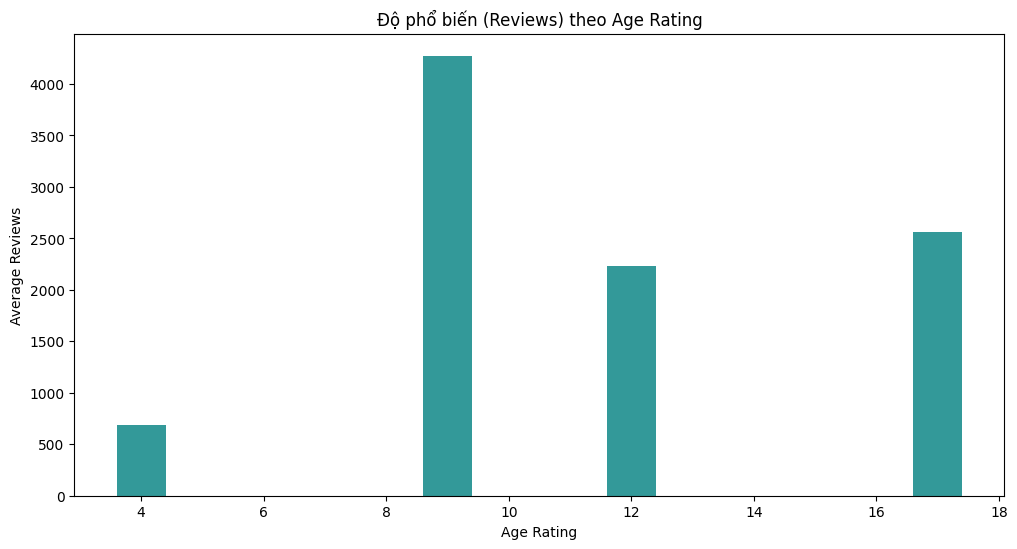

,Age_Rating,avg_reviews
0,9,4274
1,17,2563
2,12,2230
3,4,685


In [102]:
sql = """
SELECT 
    Age_Rating, 
    AVG(User_Rating_Count) AS avg_reviews
FROM dbo.App_Store_Games
GROUP BY Age_Rating
ORDER BY avg_reviews DESC;
"""

result = pd.read_sql_query(sql, trusted_connection)

plt.figure(figsize=(12, 6))
plt.bar(result['Age_Rating'], result['avg_reviews'], color='teal', alpha=0.8)
plt.xlabel('Age Rating')
plt.ylabel('Average Reviews')
plt.title('Độ phổ biến (Reviews) theo Age Rating')

plt.show()

result

Phân tíchtích
App gắn Age_Rating 9+, 12+, 17+ nhận nhiều reviews hơn, ngầm cho thấy user trẻ tương tác tích cực, nhưng cũng không kéo rating TB lên.
Các app gắn mác 9+ và 12+ chiếm phần lớn số lượng, tuy nhiên rating trung bình và tỉ lệ thành công thường thấp hơn nhóm 17+. Nguyên nhân có thể do nhóm user trẻ tuổi thường có kỳ vọng cao hơn hoặc xu hướng chấm điểm khắt khe hơn, hoặc bản thân các app cho trẻ em ít đầu tư về chất lượng hơn. 

Phân tích chi tiết từng thể loại cho thấy Games dù chiếm ưu thế về số lượng nhưng lại dẫn đầu về mức rating thấp, kéo chỉ số toàn ngành đi xuống. Số ít genre nhỏ xuất hiện các trường hợp thành công xuất sắc (ví dụ Music, Shopping) nhưng chưa tạo được xu hướng lớn. Mức độ tương tác (review cao) ở một số nhóm không đi kèm chất lượng nội dung tốt. Điều này phản ánh vấn đề bão hòa trong thị trường game di động và mở ra cơ hội cho những nhóm phát triển ứng dụng ở các thể loại niche hoặc hướng đến người dùng ít cạnh tranh.

## 7. PHÂN TÍCH PRICE

### 7.1. So sánh Free vs Paid

C:\Users\nnamn\AppData\Local\Temp\ipykernel_2972\774793552.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql, trusted_connection)


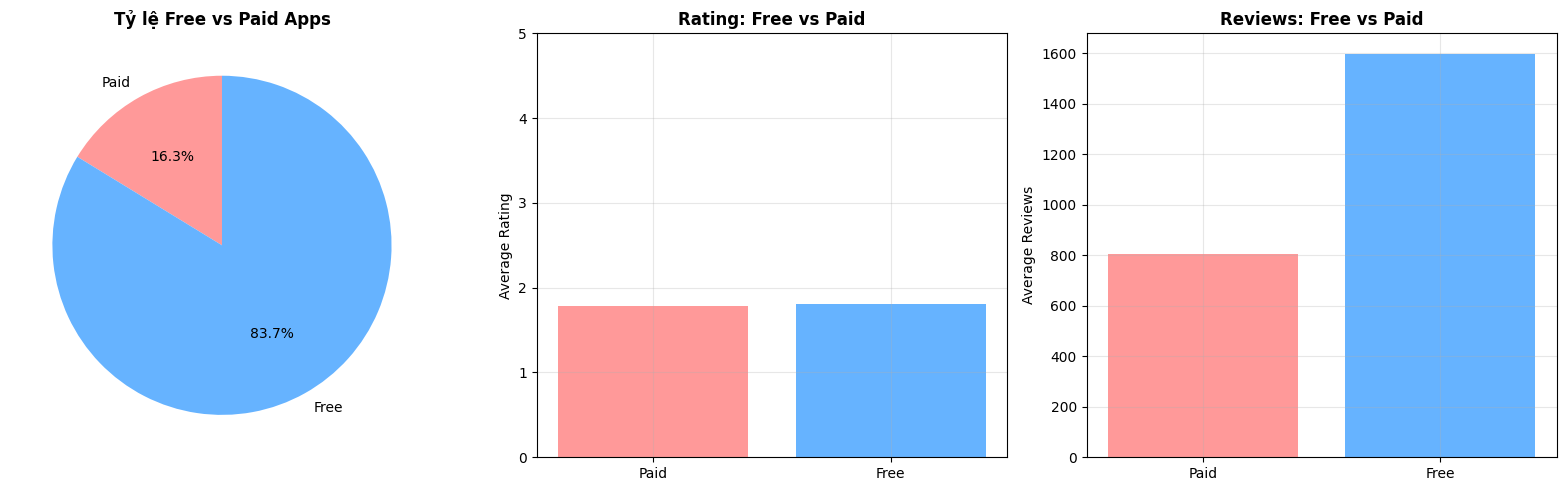

,app_type,number_of_apps,avg_rating,avg_reviews
0,Paid,2739,1.784045,803
1,Free,14108,1.809647,1598


In [110]:
sql = """
SELECT 
    CASE WHEN Price_per_App_USD = 0 THEN 'Free' ELSE 'Paid' END AS app_type,
    COUNT(*) AS number_of_apps,
    AVG(Average_User_Rating) AS avg_rating,
    AVG(User_Rating_Count) AS avg_reviews
FROM dbo.App_Store_Games
GROUP BY CASE WHEN Price_per_App_USD = 0 THEN 'Free' ELSE 'Paid' END;
"""

result = pd.read_sql_query(sql, trusted_connection)


fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Pie chart - Tỷ lệ
axes[0].pie(result['number_of_apps'], labels=result['app_type'], autopct='%1.1f%%', 
            startangle=90, colors=['#ff9999', '#66b3ff'])
axes[0].set_title('Tỷ lệ Free vs Paid Apps', fontsize=12, fontweight='bold')

# Bar chart - Rating
axes[1].bar(result['app_type'], result['avg_rating'], color=['#ff9999', '#66b3ff'])
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Rating: Free vs Paid', fontsize=12, fontweight='bold')
axes[1].set_ylim(0, 5)
axes[1].grid(True, alpha=0.3)

# Bar chart - Reviews
axes[2].bar(result['app_type'], result['avg_reviews'], color=['#ff9999', '#66b3ff'])
axes[2].set_ylabel('Average Reviews')
axes[2].set_title('Reviews: Free vs Paid', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

result

Phân tích
Free app chiếm đa số (khoảng 84%), Paid rất ít so với Free.
Avg_rating Paid ~ Free (đều rất thấp, dưới 2.0).
Free có reviews cao gấp đôi Paid: User chỉ thích dùng, ít mua app trả phí nên review ít hơn.

Trên thị trường dù là app free hay trả phí, chất lượng (rating) đều thấp.
Paid không hề giúp rating cao hơn, và lượng user tham gia đóng góp ý kiến càng hạn chế.

### 7.2. Phân tích theo Price Band

C:\Users\nnamn\AppData\Local\Temp\ipykernel_2972\1274000178.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql, trusted_connection)


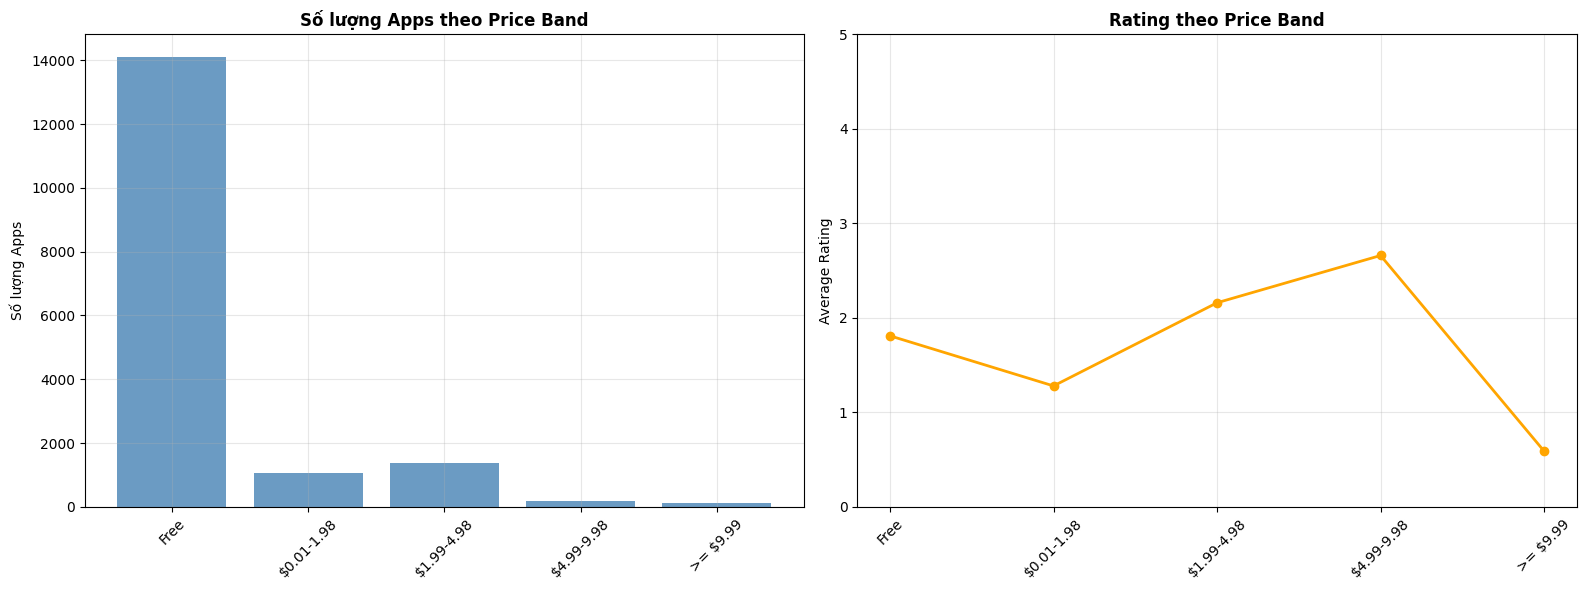

,price_band,apps,avg_reviews,avg_rating
0,Free,14108,1598,1.81
1,$0.01-1.98,1065,1018,1.28
2,$1.99-4.98,1370,749,2.16
3,$4.99-9.98,189,457,2.66
4,>= $9.99,115,22,0.59


In [115]:
sql = """
WITH price_stats AS (
  SELECT
    CASE 
      WHEN Price_per_App_USD = 0 THEN 'Free'
      WHEN Price_per_App_USD < 1.99 THEN '$0.01-1.98'
      WHEN Price_per_App_USD < 4.99 THEN '$1.99-4.98'
      WHEN Price_per_App_USD < 9.99 THEN '$4.99-9.98'
      ELSE '>= $9.99'
    END AS price_band,
    User_Rating_Count,
    Average_User_Rating
  FROM dbo.App_Store_Games
)
SELECT 
  price_band,
  COUNT(*) AS apps, 
  ROUND(AVG(User_Rating_Count), 0)   AS avg_reviews,
  ROUND(AVG(Average_User_Rating), 2) AS avg_rating
FROM price_stats
GROUP BY price_band
ORDER BY 
  CASE 
    WHEN price_band = 'Free' THEN 1
    WHEN price_band = '$0.01-1.98' THEN 2
    WHEN price_band = '$1.99-4.98' THEN 3
    WHEN price_band = '$4.99-9.98' THEN 4
    ELSE 5
  END
"""
result = pd.read_sql_query(sql, trusted_connection)

# Gán order để vẽ đúng trục x
order = ['Free', '$0.01-1.98', '$1.99-4.98', '$4.99-9.98', '>= $9.99']
result['price_band'] = pd.Categorical(result['price_band'], categories=order, ordered=True)
result = result.sort_values('price_band').reset_index(drop=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].bar(result['price_band'], result['apps'], color='steelblue', alpha=0.8)
axes[0].set_ylabel('Số lượng Apps')
axes[0].set_title('Số lượng Apps theo Price Band', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

axes[1].plot(result['price_band'], result['avg_rating'], marker='o', linewidth=2, color='orange')
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Rating theo Price Band', fontsize=12, fontweight='bold')
axes[1].set_ylim(0, 5)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

result

PPhân tích 
Rẻ (dưới $2): rating kém nhất (1.28).
Càng lên giá tầm trung/chất (2-10$), rating tốt lên (2.16 - 2.66).
Rất đắt (>= $10): cực ít review, rating thấp nhất (0.59), có thể do app siêu niche, ít user, hoặc user expect rất cao hơn sản phẩm thực tế.

Giá quá thấp: Có thể app làm kém chất lượng bán cho có, nên rating kém.
Giá càng vừa phải (mid-price), rating càng cao: Cho thấy app "chịu đầu tư" bán giá cao thường chất lượng tốt hơn.

App rất đắt không hấp dẫn user đại trà, rating tệ và ít engagement.

### 7.3. Mối tương quan Size và Price/Rating

C:\Users\nnamn\AppData\Local\Temp\ipykernel_2972\1036323525.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql, trusted_connection)


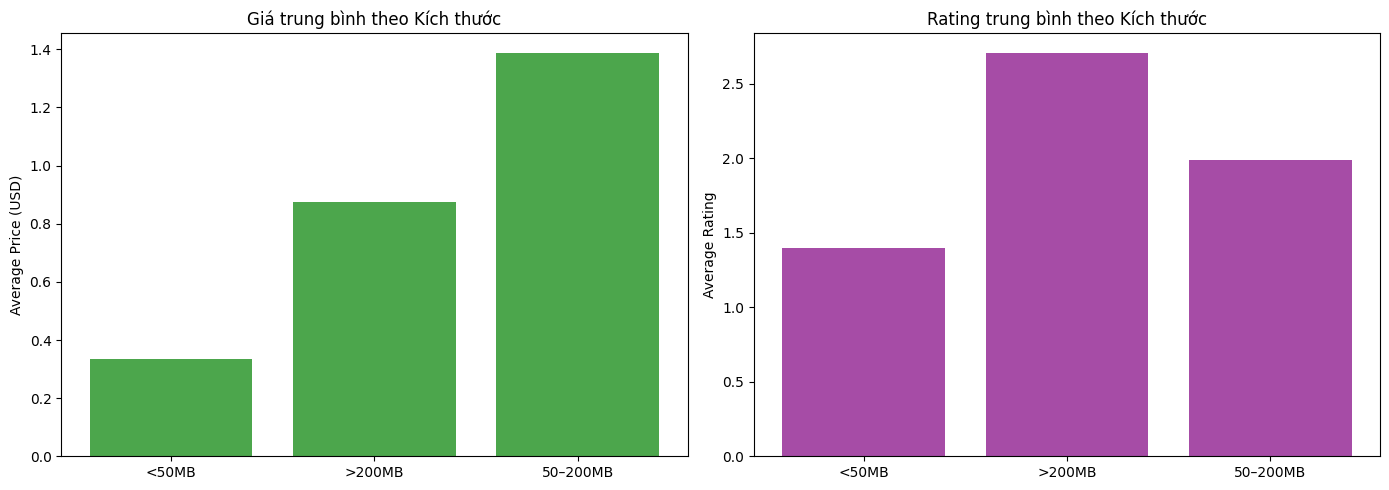

,size_bucket,avg_price,avg_rating
0,<50MB,0.334725,1.396210
1,>200MB,0.873790,2.705172
2,50–200MB,1.387335,1.985230


In [129]:
sql = """
SELECT 
  CASE 
    WHEN Size_in_Bytes < POWER(1024,2)*50 THEN '<50MB'
    WHEN Size_in_Bytes < POWER(1024,2)*200 THEN '50–200MB'
    ELSE '>200MB'
  END AS size_bucket,
  AVG(Price_per_App_USD) AS avg_price,
  AVG(Average_User_Rating) AS avg_rating
FROM dbo.App_Store_Games
WHERE Size_in_Bytes > 0
GROUP BY CASE 
    WHEN Size_in_Bytes < POWER(1024,2)*50 THEN '<50MB'
    WHEN Size_in_Bytes < POWER(1024,2)*200 THEN '50–200MB'
    ELSE '>200MB' END
ORDER BY 1,2
"""
result = pd.read_sql_query(sql, trusted_connection)

# bieu do
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Giá trung bình theo kích thước
axes[0].bar(result['size_bucket'], result['avg_price'], color='green', alpha=0.7)
axes[0].set_ylabel('Average Price (USD)')
axes[0].set_title('Giá trung bình theo Kích thước')


# Rating trung bình theo kích thước
axes[1].bar(result['size_bucket'], result['avg_rating'], color='purple', alpha=0.7)
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Rating trung bình theo Kích thước')


plt.tight_layout()
plt.show()

result


Phân tích 
App đầu tư nội dung, chất lượng thường lớn hơn (nặng MB), user đánh giá cao hơn.
App nhỏ thường là game đơn giản, app spam/kém chất lượng, rating rất thấp dù giá hấp dẫn.
App nhỏ (<50MB): Rating thấp nhất (1.40), giá siêu rẻ (0.33$).
App lớn (>200MB): Rating cao nhất (2.71), giá cũng khá ổn (0.87$).
App size trung bình (50–200MB): ở giữa.


Phân tích theo app, mức giá và dung lượng cho thấy các app miễn phí hoặc rất rẻ, dung lượng nhỏ đang chi phối số lượng nhưng cũng là nguồn gốc khiến rating toàn ngành ở mức thấp. Ngược lại, các nhóm app đầu tư về nội dung (size lớn, giá từ 2–10$) lại nhận được đánh giá cao hơn, dù chưa chiếm thị phần lớn. Hiện tượng này nhấn mạnh tầm quan trọng của đầu tư chiều sâu sản phẩm thay vì chạy đua số lượng – vừa để cải thiện rating, vừa tạo lợi thế cạnh tranh bền vững.

## 8. PHÂN TÍCH DEVELOPER

###  Top 10 nhà phát triển có rating cao nhất

C:\Users\nnamn\AppData\Local\Temp\ipykernel_2972\3124493035.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql, trusted_connection)


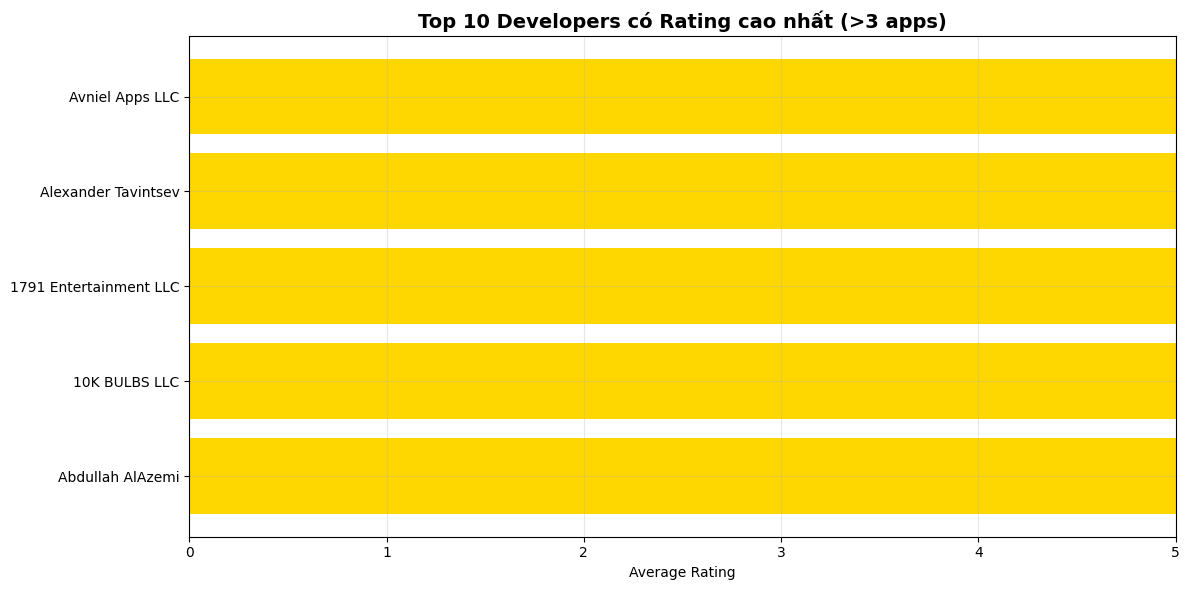

,Developer,avg_rating,apps
0,Avniel Apps LLC,5.0,1
1,Alexander Tavintsev,5.0,1
2,1791 Entertainment LLC,5.0,1
3,10K BULBS LLC,5.0,1
4,Abdullah AlAzemi,5.0,1


In [113]:
sql = """
SELECT TOP 5 
    Developer, 
    AVG(Average_User_Rating) AS avg_rating, 
    COUNT(*) AS apps
FROM dbo.App_Store_Games
GROUP BY Developer
ORDER BY avg_rating DESC;
"""

result = pd.read_sql_query(sql, trusted_connection)

plt.figure(figsize=(12, 6))
plt.barh(result['Developer'], result['avg_rating'], color='gold')
plt.xlabel('Average Rating')
plt.title('Top 10 Developers có Rating cao nhất (>3 apps)', fontsize=14, fontweight='bold')
plt.xlim(0, 5)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

result

C:\Users\nnamn\AppData\Local\Temp\ipykernel_2972\3124493035.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql, trusted_connection)


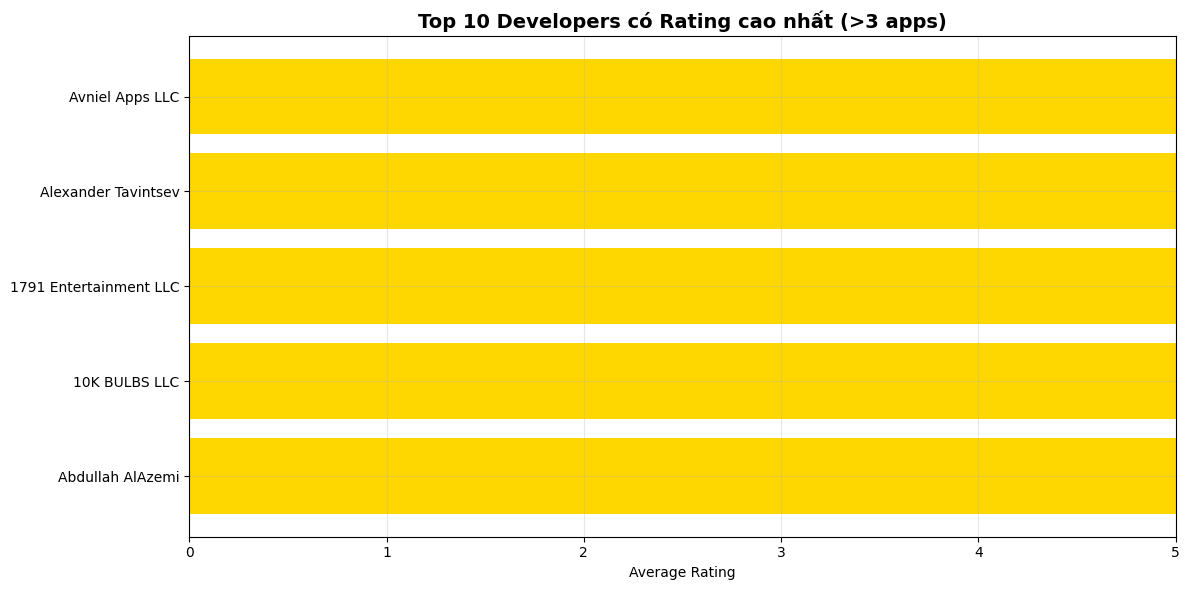

,Developer,avg_rating,apps
0,Avniel Apps LLC,5.0,1
1,Alexander Tavintsev,5.0,1
2,1791 Entertainment LLC,5.0,1
3,10K BULBS LLC,5.0,1
4,Abdullah AlAzemi,5.0,1


In [ ]:
sql = """
SELECT TOP 5 
    Developer, 
    AVG(Average_User_Rating) AS avg_rating, 
    COUNT(*) AS apps
FROM dbo.App_Store_Games
GROUP BY Developer
ORDER BY avg_rating DESC;
"""

result = pd.read_sql_query(sql, trusted_connection)

plt.figure(figsize=(12, 6))
plt.barh(result['Developer'], result['avg_rating'], color='gold')
plt.xlabel('Average Rating')
plt.title('Top 10 Developers có Rating cao nhất (>3 apps)', fontsize=14, fontweight='bold')
plt.xlim(0, 5)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

result

### NewDev vs ExistingDev theo năm

C:\Users\nnamn\AppData\Local\Temp\ipykernel_39948\1064143913.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query(sql, trusted_connection)


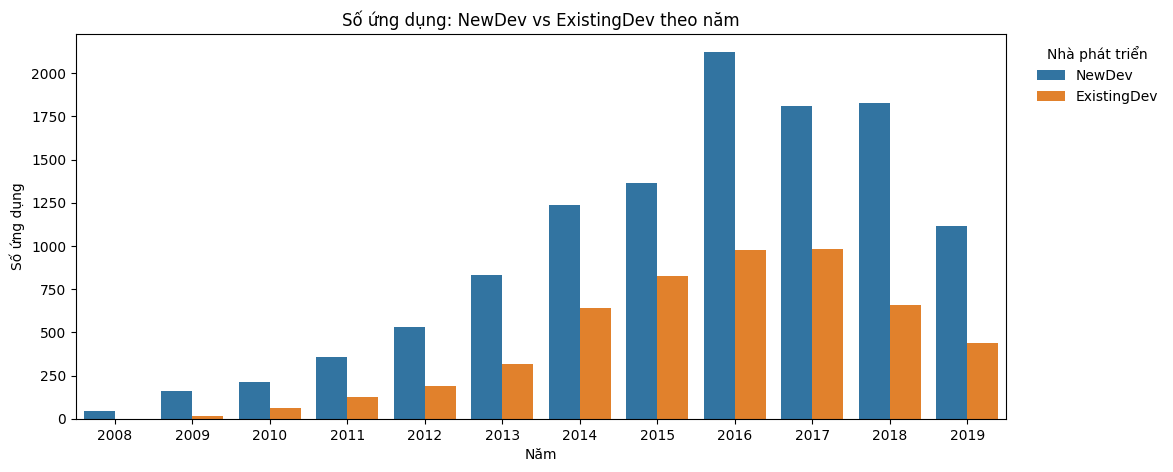

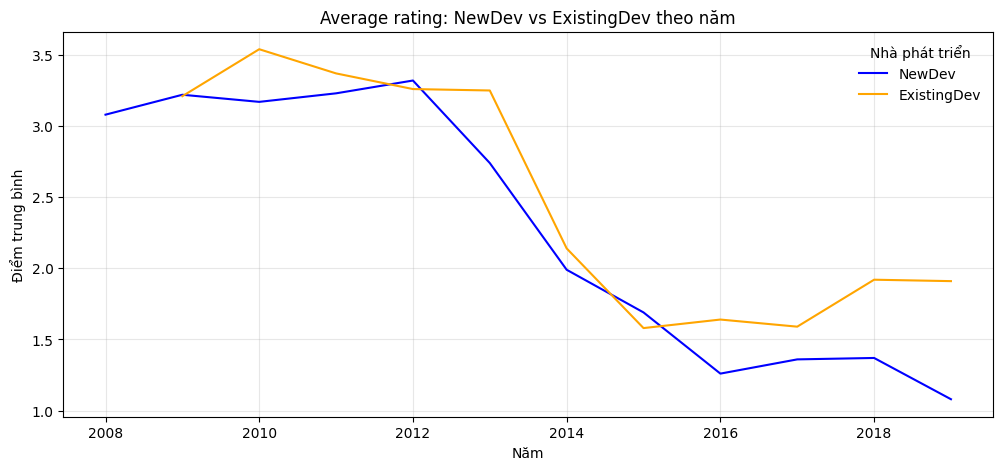

,release_year,dev_type,apps,avg_rating
0,2008,NewDev,46,3.08
1,2009,ExistingDev,14,3.21
2,2009,NewDev,161,3.22
3,2010,ExistingDev,61,3.54
4,2010,NewDev,215,3.17
5,2011,ExistingDev,128,3.37
6,2011,NewDev,355,3.23
7,2012,ExistingDev,192,3.26
8,2012,NewDev,531,3.32
9,2013,ExistingDev,319,3.25


In [15]:
sql = """
WITH dev_stats AS (
  SELECT
    DATEPART(YEAR, Release_Date) AS release_year,
    Developer,
    MIN(DATEPART(YEAR, Release_Date)) OVER (PARTITION BY Developer) AS dev_first_year,
    Average_User_Rating AS rating,
    User_Rating_Count   AS reviews
  FROM dbo.App_Store_Games
)
SELECT
  release_year,
  CASE WHEN release_year = dev_first_year THEN 'NewDev' ELSE 'ExistingDev' END AS dev_type,
  COUNT(*)                              AS apps,
  CAST(AVG(rating*1.0) AS DECIMAL(4,2)) AS avg_rating
FROM dev_stats
GROUP BY release_year,
         CASE WHEN release_year = dev_first_year THEN 'NewDev' ELSE 'ExistingDev' END
ORDER BY release_year, dev_type;
"""

result = pd.read_sql_query(sql, trusted_connection)  

# bieu do 
plt.figure(figsize=(12,5))
sns.barplot(data= result, x='release_year', y='apps', hue='dev_type')
plt.xlabel('Năm'); plt.ylabel('Số ứng dụng')
plt.title('Số ứng dụng: NewDev vs ExistingDev theo năm')
plt.legend(title='Nhà phát triển', loc='upper left', bbox_to_anchor=(1.02,1), frameon=False)
plt.show()


plt.figure(figsize=(12,5))
for typ, color in [('NewDev','blue'), ('ExistingDev','orange')]:
    s = result[result['dev_type']==typ].sort_values('release_year')
    plt.plot(s['release_year'], s['avg_rating'], label=typ, color=color)
plt.xlabel('Năm'); plt.ylabel('Điểm trung bình')
plt.title('Average rating: NewDev vs ExistingDev theo năm')
plt.grid(True, alpha=0.3); plt.legend(title='Nhà phát triển', frameon=False)
plt.show()

result

Phân tích
Khối lượng: NewDev bùng nổ từ 2013 (831) → đỉnh 2016 (2,122) và luôn vượt ExistingDev sau 2013.
Chất lượng: Từ 2013 trở đi, rating NewDev thấp hơn ExistingDev rõ rệt và rơi nhanh: 2.74 (2013) → 1.08 (2019). ExistingDev cũng giảm nhưng ít hơn: ~3.25 (2013) → ~1.91 (2019).
Oversaturation bởi NewDev: Lượng dev mới tăng mạnh sau 2013 đẩy volume, nhưng chất lượng thấp → kéo rating toàn thị trường xuống.

## KẾT LUẬN
